In [31]:
import pandas as pd
import numpy as np
import yfinance as yf
import random
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import secrets
from tqdm import tqdm
#warnings.simplefilter(action='ignore', category=FutureWarning)


<h1>Variables</h1>


In [32]:
TICKER="IWDA.AS"
NUMBER_OF_SIMULATIONS=1000
STARTING_CAPITAL = 10000
YEARS_OF_SIMULATION=30

In [33]:

Market_Days=253
df=yf.download(TICKER)["Adj Close"].pct_change(1).dropna()

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

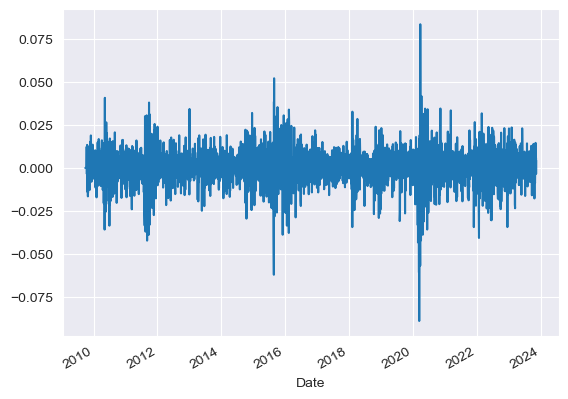

In [34]:
df.plot()

In [35]:
df

Date
2009-09-28    0.000000
2009-09-29    0.000000
2009-09-30    0.000000
2009-10-01    0.000000
2009-10-02    0.000000
                ...   
2023-11-03    0.005027
2023-11-06   -0.002663
2023-11-07    0.005862
2023-11-08   -0.003432
2023-11-09    0.004418
Name: Adj Close, Length: 3618, dtype: float64

In [36]:
df_simulations=np.zeros((YEARS_OF_SIMULATION,NUMBER_OF_SIMULATIONS))
df_simulations[0,:]=STARTING_CAPITAL

for x in tqdm(range(0,NUMBER_OF_SIMULATIONS)):
    for i in range(1,YEARS_OF_SIMULATION):
        annual_change=1
        for k in range(Market_Days):
            annual_change=annual_change*(1+(secrets.choice(df.iloc[:])))
        df_simulations[i,x]=annual_change*df_simulations[i-1,x]
df_simulations= pd.DataFrame(df_simulations)
df_simulations_1=  pd.DataFrame(df_simulations)



  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\dadoi\anaconda3\Lib\random.py:374: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return seq[self._randbelow(len(seq))]
100%|██████████| 1000/1000 [03:25<00:00,  4.88it/s]


In [44]:
df_simulations_1

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
1,10648.278338,9850.898265,11203.442957,9280.829408,14255.320311,10541.270024,9420.881313,10428.105943,7512.705851,9850.905567,...,11813.434074,12150.626041,13578.012712,11863.392003,12114.516487,11037.972270,11669.954639,9871.719080,12744.075588,8429.401668
2,13681.678813,9061.600371,12712.564970,8826.918545,18760.947427,13118.944161,9925.839179,12983.764293,8187.206501,14957.247670,...,13486.917194,10979.342773,11826.519703,13145.241767,11785.684872,11942.849696,13176.267305,10992.426053,14410.196248,7220.681751
3,16511.640887,10130.550492,12874.603139,10003.923855,21268.398502,16952.513575,10910.591730,13777.792284,10208.687331,16864.184073,...,13565.364234,11341.924394,10236.218994,16793.521703,12749.554622,16490.482649,13248.715807,11155.031063,17212.893448,9000.527607
4,20456.270455,7743.867259,10749.676376,10906.362286,21306.900785,25380.675597,11024.762069,17443.807372,12907.205435,20483.485821,...,13331.685112,10527.219101,9919.571644,14932.170013,11449.112018,22968.022552,15989.393167,10133.890774,15997.126360,13815.181431
5,17389.831891,9518.740528,12838.010641,10796.031063,20337.948641,30364.586076,12938.798926,19620.406787,12278.151214,26037.517965,...,21556.508088,8744.077486,10760.082025,20066.926348,10623.403777,25559.477608,21291.185156,9255.436268,10798.283715,15505.063551
6,21009.235469,14687.604150,14145.981905,10500.230917,17974.124426,40488.076461,10765.965352,27016.490139,11017.541761,33455.226170,...,19781.209108,10967.696622,11859.020494,31686.208651,13860.390642,30822.421312,24904.355000,11378.766744,12578.064160,15409.213317
7,28332.901861,15439.763067,16832.501496,13023.093167,23957.276891,37185.640903,11916.425467,26799.365805,12978.639911,31261.283293,...,25187.035298,14340.901076,12531.337085,29781.532882,13001.238951,33196.279078,24957.499532,11638.705864,17213.675277,20622.628028
8,25061.572226,21343.639194,21384.968393,16063.680076,30299.929260,44849.673857,14066.758584,32046.289604,13872.594496,30574.847308,...,32140.668571,16338.670868,12552.959939,23958.295754,18008.156766,55325.138012,29290.669269,13454.322777,17938.948300,24251.498124
9,25305.224496,23198.800822,19550.323899,19210.123800,28339.722978,55747.632810,17955.302701,40778.566445,16397.549882,39540.017361,...,37508.036224,17784.984382,13336.687774,22701.408010,15004.559914,61982.954116,30622.934231,17083.695545,23532.445098,22195.850557


In [45]:
df_simulations=df_simulations_1
df_simulations.iloc[YEARS_OF_SIMULATION-1]

0      453286.537042
1       89189.495885
2      284548.732057
3      162943.889892
4       43450.898503
           ...      
995    906175.765532
996    103935.921144
997     31890.357577
998    139724.773233
999    298035.321518
Name: 29, Length: 1000, dtype: float64

In [59]:
quantile=df_simulations.iloc[YEARS_OF_SIMULATION-1].quantile([0.1,0.9])
quantile=list(quantile)
print(quantile)
df_simulations_purged=df_simulations[df_simulations.columns[ df_simulations.max() < quantile[1]]]
df_simulations_purged=df_simulations_purged[df_simulations_purged.columns[ df_simulations_purged.max() > quantile[0]]]


[76280.69582354183, 599037.1919780761]


<Axes: title={'center': 'Simulation of 1000 portfolios'}>

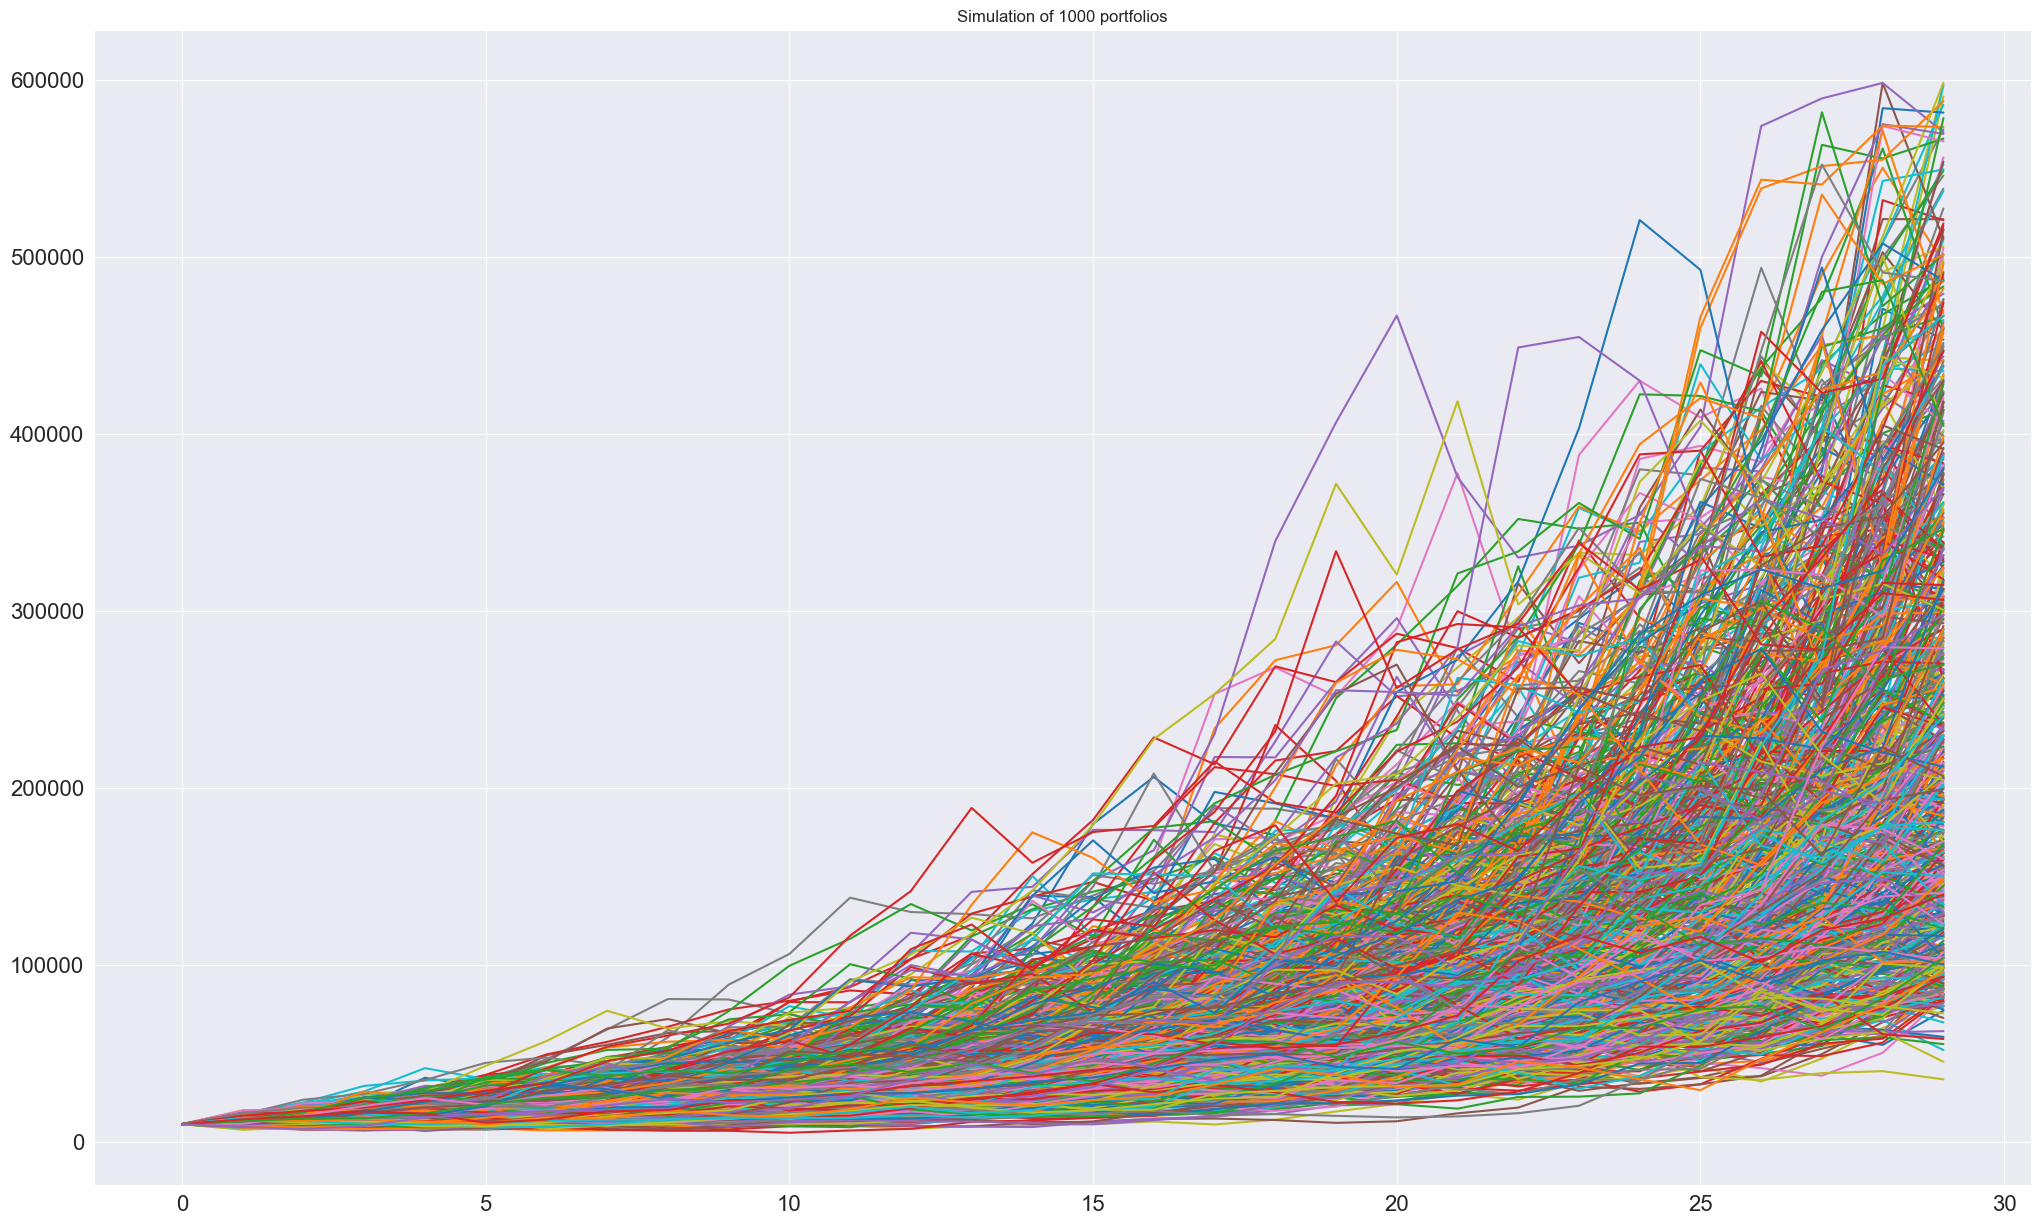

In [60]:
df_simulations_purged.plot(legend=None,logy=False,fontsize=16,figsize=(25,15),title=f"Simulation of {NUMBER_OF_SIMULATIONS} portfolios")

In [41]:
!jupyter nbconvert --to html Portfolio1.ipynb

[NbConvertApp] Converting notebook Portfolio1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 339931 bytes to Portfolio1.html
